# Исследование объявлений о продаже квартир

# <a name="0.0"></a>Содержание:
* [0. Описание проекта, данных, цель, план работы](#0.)
* [1. (Шаг 1) Ознакомление с данными](#1.)
* [2. (Шаг 2) Предобработка данных](#2.)
* [3. (Шаг 3) Добавление новых столбцов](#3.)
* [4. (Шаг 4) Исследовательский анализ данных:](#4.)
     - [4.1. Изучение данных по площади, цене, числу комнат, высоте потолков и другим параметрам](#4.1.)
     - [4.2. Изучение данных по времени продажи квартир (days_exposition)](#4.2.)     
     - [4.3. Изучение факторов, наиболее влияющих на общую (полную) стоимость объекта.](#4.3.)
     - [4.4. Средняя цена одного квадратного метра в топ-10 населённых пунктах.](#4.4.)     
     - [4.5. Средняя цена километра от центра (по квартирам в пределах Санкт-Петербурга)](#4.5.) 
* [5. (Шаг 5) Общий вывод](#5.)<br/><br/><br/>

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости, установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель проекта**

Провести исследование с целью выявить влияние интересных особенностей и зависимостей на рыночную стоимость объектов недвижимости.

Результаты исследования будут учтены при построении автоматизированной системы, которая отследит аномалии и мошенническую деятельность на рынке недвижимости.

**Задачи проекта**

1. Изучить данные.
2. Выполнить предобработку данных.
3. Добавить новые параметры объектов.
4. Выполнить исследовательский анализ данных.
5. Написать общий вывод.

**Описание данных**

Входные данные: архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах от сервиса Яндекс.Недвижимость. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

Файл: `real_estate_data.csv`.

Описание столбцов:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**План работы**

1. Загрузим данные из файла в датафрейм, изучим общую информацию.
2. Выполним предобработку данных.
3. Добавим в таблицу новые столбцы.
4. Выполним исследовательский анализ данных.
5. Опишем полученные результаты и напишем основной вывод проведённого исследования

<a name="1."></a><font size="5"><b>Шаг 1. Ознакомление с данными</b></font><br/> 
<font size="2">([к содержанию](#0.0))</font>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import pprint

In [2]:
# чтение файла с данными и сохранение в df
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
# для лучшей наглядности отобразим все колонки таблицы 
pd.set_option('display.max_columns', None)

# ознакомимся с первыми 10 строками таблицы
data.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# посмотрим общие сведения о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# также взглянем на рандомную выборку данных из иаблицы
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22794,13,4300000.0,40.00,2019-04-29T00:00:00,1,2.60,12.0,21.00,4,NaN,False,False,6.70,NaN,Санкт-Петербург,46527.0,16047.0,0.0,NaN,0.0,NaN,NaN
7556,2,4500000.0,37.00,2018-10-26T00:00:00,1,NaN,17.0,16.10,14,NaN,False,False,10.30,NaN,Санкт-Петербург,18621.0,17623.0,1.0,1510.0,2.0,372.0,53.0
16882,0,3870000.0,83.77,2017-11-10T00:00:00,3,NaN,10.0,49.80,2,NaN,False,False,10.60,1.0,поселок городского типа имени Свердлова,NaN,NaN,NaN,NaN,NaN,NaN,183.0
17810,5,3400000.0,36.00,2018-10-21T00:00:00,1,2.80,16.0,16.00,16,NaN,False,False,11.00,2.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,60.0
23168,15,4100000.0,37.60,2017-11-06T00:00:00,1,2.70,17.0,14.40,3,NaN,False,False,9.70,1.0,Санкт-Петербург,14741.0,12665.0,0.0,NaN,0.0,NaN,207.0
1271,19,8940000.0,82.00,2019-04-02T00:00:00,3,2.57,9.0,49.30,4,NaN,False,False,10.80,2.0,Санкт-Петербург,32752.0,13851.0,0.0,NaN,1.0,651.0,NaN
13023,8,11000000.0,127.30,2018-09-09T00:00:00,1,3.10,5.0,55.50,4,NaN,False,False,14.80,NaN,Санкт-Петербург,20750.0,2045.0,2.0,284.0,3.0,175.0,4.0
7478,0,5800000.0,79.60,2018-10-06T00:00:00,3,2.80,24.0,49.00,3,NaN,False,False,9.00,1.0,посёлок Шушары,12648.0,18434.0,0.0,NaN,0.0,NaN,NaN
14933,8,5700000.0,49.40,2017-09-01T00:00:00,2,NaN,9.0,30.00,2,NaN,False,False,8.00,0.0,Санкт-Петербург,13706.0,14785.0,0.0,NaN,0.0,NaN,17.0
4858,2,2885000.0,33.50,2019-03-29T00:00:00,1,NaN,19.0,14.57,14,NaN,False,False,10.64,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# получим описание данных в нашем датафрейме
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

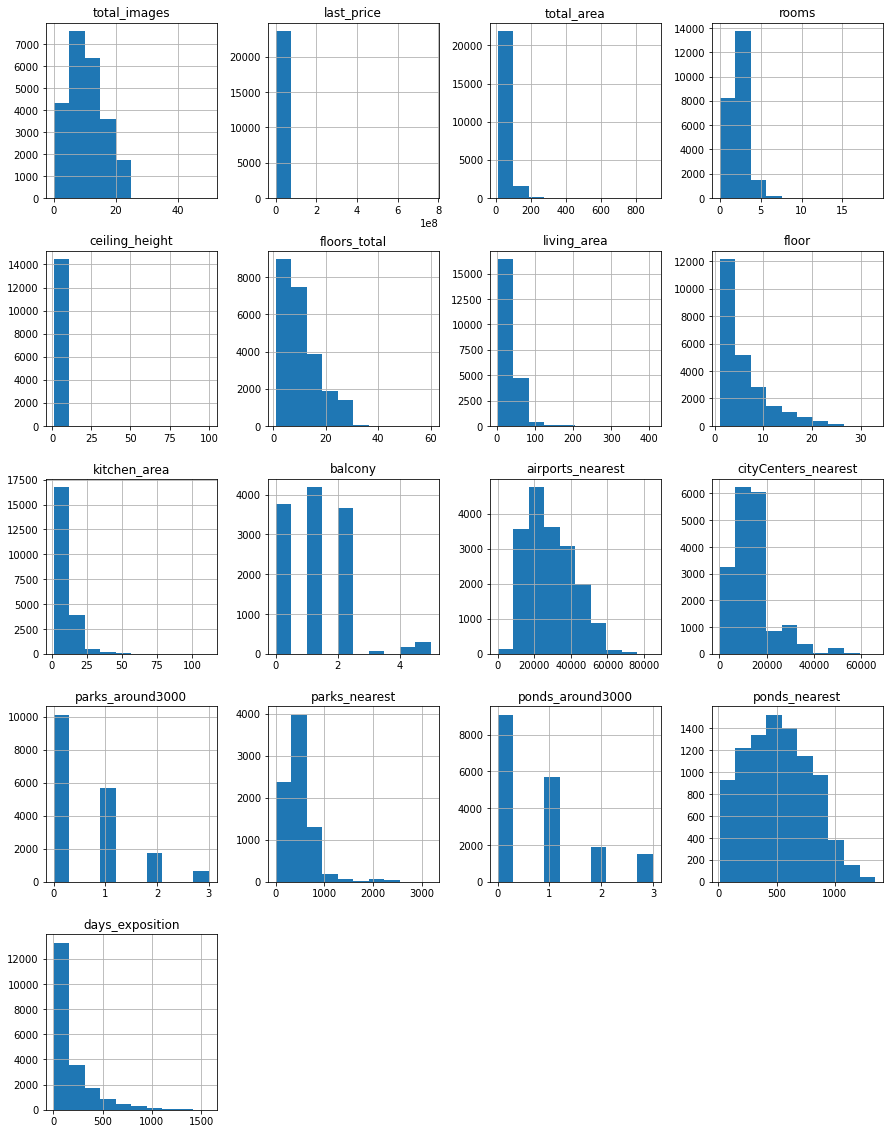

In [7]:
# построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))

• При визуальном ознакомлении с данными мы видим, что есть много пропущенных значений в болшинстве столбцов. Присутствуют не совсем корректные названия столбцов и некорректные типы данных в столбцах, например в 'floors_total' тип float лучше заменить на целочисленный, ведь дома не строят скажем, в 1,3 или в 1,5 этажа.

• Высота потолков не может быть двузначной величиной, а также меньше примерно 2,5 м (в данных существуют значения в 1,26 м и даже в 1 м). Пропущенные значения мы можем заменить на медианные для зданий соотвестующей этажности.

• По числу этажей в здании заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями возможно придется удалить.

• Жилая площадь и площадь кухни нам так же неизвестны в некоторых случаях, однако в квартирах-студиях мы можем отсутствующую площадь кухни заменить на нули, так как в таких квартирах кухня совмещена как правило с жилой комнатой.

• Наличие балкона играет большую роль в формировании стоимости квартиры, поэтому предположим, что при продаже наличие балкона скорее всего не забыли бы упомянуть. Поэтому заменим отсутствующие значения на нули.

• Название населенного пункта очень важный фактор для исследования и мы не можем заполнить пропущенные значения на основе других признаков, соответственно, пропущенные значения скорее всего придется удалить.

• Расстояние до центра города и таких объектов как водоемы, аэропорты так же оставим не заполненными, так как не можем определить их по другим признакам и некоторые данные не будем использовать в этом анализе.

<a name="2."></a><font size="5"><b>Шаг 2. Предобработка данных</b></font><br/> 
<font size="2">([к содержанию](#0.0))</font>

In [8]:
# выведем названия столбцов
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [9]:
# переименуем столбы
cols_names = ['total_images',
              'last_price',
              'total_area_m2',
              'first_day_exposition',
              'number_of_rooms',
              'ceiling_height_m',
              'total_floors_in_house',
              'living_area_m2',
              'floor',
              'is_apartment',
              'is_studio',
              'is_open_plan',
              'kitchen_area_m2',
              'number_of_balconies',
              'city_name',
              'nearest_airport_distance_m',
              'city_center_distance_m',
              'parks_numbers_within_3km',
              'nearest_park_distance_m',
              'ponds_number_within_3km',
              'nearest_pond_distance_m',
              'days_exposition']
data.set_axis(cols_names, axis='columns', inplace=True)

In [10]:
# для большего удобства работы поменяем положение столбцов начиная с самой значимой для нас информации и заказчивая второстепенной
data = data[[
 'city_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_open_plan',
 'is_apartment',
 'is_studio',
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

data.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,False,NaN,False,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,False,NaN,False,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,False,NaN,False,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,False,NaN,False,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,NaN,False,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


In [11]:
# подсчитаем и отсортируем суммы отсуствующих значений в столбцах и выведем на экран
data.isnull().sum().sort_values()

is_open_plan                      0
total_area_m2                     0
first_day_exposition              0
last_price                        0
total_images                      0
number_of_rooms                   0
is_studio                         0
floor                             0
city_name                        49
total_floors_in_house            86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_number_within_3km        5518
parks_numbers_within_3km       5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m               9195
number_of_balconies           11519
nearest_pond_distance_m       14589
nearest_park_distance_m       15620
is_apartment                  20924
dtype: int64

Как видим, существует множество пропущенных значений с расстоянием до парков, водоемов, центра города и аэропортов. Наиболее вероятная причина - эти значения проставляются системой автоматически, и из-за ее неточности возникают такие пропуски. В таком случае можно сделать апгрейд системы, чтобы она просчитывала и проставляла такие значения по картам(как навигатор). Так же из возможных причин, если система не автоматизированна, то люди скорее всего могут не знать точного расстояния до центра города, парков, водоемов и аэропортов. Или же им просто лень заполнять подобную информацию.

Отсутствие указания данных в столбцах с названием города и метражом жилой площади и кухни, этажности дома, числом балконов - пропуски более странной природы, так как это важная и точная информация.

Столбец 'is_apartment' является данными о том, какой статус у помещения, жилое или коммерческое. Пока можно сделать предположение, что отсутствующие значения это статус "не апартаменты", что означает, что это не жилое помещение.

In [12]:
# выведем на экран и проверим названия городов
data['city_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

Некоторые названия дублируются с разницей написания "е" и "ё", например 'поселок Пансионат Зелёный Бор'. Заменим везде написание на "е".

In [13]:
# выведем количество уникальных значений
len(data['city_name'].unique())

365

In [14]:
# заменим "ё" на "е"
data['city_name'] = data['city_name'].str.replace('ё', 'е', regex=True)

In [15]:
# обработаем ещё неявных дубликатов
data['city_name'] = data['city_name'].str.replace('поселок городского типа', 'поселок', regex=True)
data['city_name']  = data['city_name'].str.replace('городской поселок', 'поселок')
data['city_name']  = data['city_name'].replace('Мурино', 'поселок Мурино')

In [16]:
#посмотрим, сколько уникальных значений
len(data['city_name'].unique())

322

В данных было 43 дублирующих значений, отличающихся написанием одной буквы и видом посёлка, которые мы убрали.

In [17]:
# проверим сколько отсуствующих значений в столбце с названием города
data['city_name'].isna().sum()

49

В масштабах данной выборки 49 строк это достаточно мало, а без информации о городе мы не можем делать никаких выводов, так как не возможно по другим признакам определить город и заменить пропущенные значения. Поэтому мы удалим данные строки.

In [18]:
# удаляем строки с пропущенными значениями
data = data.dropna(subset=['city_name'])

In [19]:
# проверим удалились ли строки
data['city_name'].isna().sum()

0

In [20]:
# посмотрим данные по высоте потолков
ceiling_medians = data.pivot_table(index='total_floors_in_house', values='ceiling_height_m', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

,median,count
total_floors_in_house,,
1.0,2.80,10
2.0,2.70,213
3.0,2.80,399
4.0,3.00,787
5.0,2.55,3662


In [21]:
# заменим значения высоты потолков на общую медиану для отсутствующих значений этажности дома
for floor in ceiling_medians.index:
    data.loc[(data['total_floors_in_house'].isna()) | 
             ((data['total_floors_in_house'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height_m'] = data['ceiling_height_m'].describe()[5]

# медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height_m'].isna()) & 
             (data['total_floors_in_house'] == floor), 
             'ceiling_height_m'] = ceiling_medians.loc[floor, 'median']

In [22]:
# теперь взглянем на все значения высоты потолков
data[['ceiling_height_m']].describe()

,ceiling_height_m
count,23650.000000
mean,2.735429
std,0.995219
min,1.000000
25%,2.550000
50%,2.650000
75%,2.750000
max,100.000000


Имеются аномальные значения, как сверхнизкие, высотой 1 метр, так и сверхвысокие - 100 метров. Заменим все выбивающиеся за норму значения на медианные.

In [23]:
data['ceiling_height_m'].unique()

array([  2.7 ,   2.75,   2.55,   2.6 ,   3.03,   2.65,   2.66,   2.5 ,
         2.67,   2.56,   3.  ,   3.05,   2.8 ,   2.9 ,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,  14.85,   2.52,   5.2 ,   2.87,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [24]:
data.update(data[(data['ceiling_height_m'] >= 20) & (data['ceiling_height_m'] <= 36)]['ceiling_height_m']/10)
data['ceiling_height_m'].unique()

array([  2.7 ,   2.75,   2.55,   2.6 ,   3.03,   2.65,   2.66,   2.5 ,
         2.67,   2.56,   3.  ,   3.05,   2.8 ,   2.9 ,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,  14.85,   2.52,   5.2 ,   2.87,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,
      

In [25]:
# заменяем на медиану
data.loc[(data['ceiling_height_m'] > 10) | (data['ceiling_height_m'] < 2.5), 'ceiling_height_m'] = data['ceiling_height_m'].median()

In [26]:
# и снова взглянем на все значения высоты потолков
data[['ceiling_height_m']].describe()

,ceiling_height_m
count,23650.000000
mean,2.709216
std,0.243871
min,2.500000
25%,2.550000
50%,2.650000
75%,2.750000
max,8.300000


Теперь данные по высоте выглядят более правдиво.

In [27]:
# посмотрим сколько пропущенных значений с этажностью здания
data['total_floors_in_house'].isna().sum()

85

In [28]:
# выведем эти строки
data[data['total_floors_in_house'].isna()]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
186,Санкт-Петербург,65.2,30.80,12.00,2.65,2,NaN,4,NaN,False,NaN,False,12,11640000.0,2018-10-02T00:00:00,49.0,12373.0,39197.0,1.0,123.0,0.0,NaN
237,Санкт-Петербург,28.1,20.75,NaN,2.65,1,0.0,1,NaN,False,NaN,False,4,2438033.0,2016-11-23T00:00:00,251.0,17369.0,22041.0,0.0,NaN,1.0,374.0
457,Санкт-Петербург,70.8,38.40,10.63,2.65,2,0.0,12,NaN,False,NaN,False,4,9788348.0,2015-08-01T00:00:00,727.0,8322.0,37364.0,2.0,309.0,2.0,706.0
671,Санкт-Петербург,93.6,47.10,16.80,2.65,3,0.0,8,NaN,False,NaN,False,4,6051191.0,2017-04-06T00:00:00,123.0,17369.0,22041.0,0.0,NaN,1.0,374.0
1757,Санкт-Петербург,39.0,NaN,NaN,2.65,1,0.0,9,NaN,False,NaN,False,5,3600000.0,2017-04-22T00:00:00,77.0,11618.0,22735.0,1.0,835.0,1.0,652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,Санкт-Петербург,63.5,NaN,NaN,2.65,2,NaN,3,NaN,False,NaN,False,5,8500000.0,2017-05-24T00:00:00,512.0,15363.0,51340.0,0.0,NaN,1.0,853.0
22656,Санкт-Петербург,64.5,31.70,14.40,2.65,2,0.0,20,NaN,False,NaN,False,4,4574160.0,2017-04-02T00:00:00,127.0,17369.0,22041.0,0.0,NaN,1.0,374.0
22808,Санкт-Петербург,110.4,45.38,23.42,2.65,3,0.0,6,NaN,False,NaN,False,0,14569263.0,2016-11-20T00:00:00,260.0,4529.0,19095.0,0.0,NaN,0.0,NaN
23590,Санкт-Петербург,123.3,50.40,23.60,2.65,3,0.0,18,NaN,False,NaN,False,0,21187872.0,2017-04-25T00:00:00,104.0,4529.0,19095.0,0.0,NaN,0.0,NaN


Это не является каким-то значительным числом строк в масштабах данной выборки, и казалось бы, мы можем их удалить, однако, в них содержатся другие ценные для нас данные и чтобы их сохранить, мы заменим пропуски на значения этажа квартиры.

In [29]:
# заменим значения
data['total_floors_in_house'].fillna(value=data['floor'], inplace=True)

In [30]:
# проверим, остались ли пропущенные значения в столбце
data['total_floors_in_house'].isna().sum()

0

In [31]:
# выведем уникальные значения числа комнат
data['number_of_rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [32]:
# взглянем на строки с нулевым значением комнат
data[data['number_of_rooms'] == 0]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
144,поселок Мурино,27.00,15.50,NaN,2.75,0,2.0,2,24.0,False,NaN,True,1,2450000.0,2017-03-30T00:00:00,181.0,NaN,NaN,NaN,NaN,NaN,NaN
349,деревня Кудрово,25.00,17.00,NaN,2.60,0,0.0,1,14.0,True,NaN,False,4,2320000.0,2017-09-27T00:00:00,45.0,NaN,NaN,NaN,NaN,NaN,NaN
440,Санкт-Петербург,27.11,24.75,NaN,2.70,0,2.0,4,17.0,False,NaN,True,8,2480000.0,2018-03-12T00:00:00,64.0,15015.0,38171.0,0.0,NaN,2.0,982.0
508,поселок Парголово,34.40,24.30,NaN,2.66,0,1.0,19,26.0,True,NaN,False,0,3375000.0,2017-03-28T00:00:00,430.0,19292.0,53115.0,0.0,NaN,1.0,593.0
608,поселок Шушары,25.00,NaN,NaN,2.60,0,NaN,7,10.0,False,NaN,True,2,1850000.0,2019-02-20T00:00:00,29.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,Санкт-Петербург,26.00,18.00,NaN,2.75,0,0.0,16,25.0,False,NaN,True,7,3200000.0,2017-09-01T00:00:00,14.0,13222.0,11405.0,0.0,NaN,1.0,623.0
23442,поселок Мурино,27.70,18.00,NaN,2.75,0,2.0,4,24.0,True,NaN,False,0,2500000.0,2017-09-28T00:00:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN
23554,Санкт-Петербург,26.00,NaN,NaN,2.75,0,NaN,8,19.0,False,NaN,True,15,3350000.0,2018-09-07T00:00:00,31.0,17092.0,18090.0,0.0,NaN,2.0,112.0
23592,Никольское,29.00,18.00,NaN,2.55,0,2.0,8,9.0,True,NaN,False,10,1450000.0,2017-11-11T00:00:00,82.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# вычислим медианы числа комнат по общей площади
room_medians = data.pivot_table(index='total_area_m2', values='number_of_rooms', aggfunc=['median', 'count'])
room_medians.columns = ['median', 'count']

In [34]:
# затем заменим нулевые значения медианными
for room in room_medians.index:
    data.loc[(data['number_of_rooms'] == 0), 
             'number_of_rooms'] = room_medians.loc[room, 'median']

In [35]:
# ещё раз проверим уникальные значения количества комнат
data['number_of_rooms'].unique()

array([ 3.,  1.,  2.,  4.,  5.,  6.,  7., 11.,  8., 14., 10., 15.,  9.,
       19., 16., 12.])

In [36]:
# смотрим количество строк с аномальным количеством комнат
len(data.loc[data['number_of_rooms'] > 7])

31

In [37]:
# удалим строки, где количество комнат больше 7, сильно на анализ они не повлияют
data = data[(data['number_of_rooms'] <= 7)]

In [38]:
# взглянем на квартиры с неуказанной жилой площадью, но не студии
len(data[(data['living_area_m2'].isna()) & (data['is_studio'] == False)])

1887

In [39]:
# взглянем на квартиры с неуказанной площадью кухни, но не студии
len(data[(data['kitchen_area_m2'].isna()) & (data['is_studio'] == False)])

2116

In [40]:
# просмотрим на данные по жилой площади
data[['living_area_m2']].describe()

,living_area_m2
count,21722.000000
mean,34.230118
std,21.098202
min,2.000000
25%,18.600000
50%,30.000000
75%,42.200000
max,347.500000


Минимальное значение жилой площади составляет 2 кв.м, что слишком мало. Предположим, что минимальная жилая площадь - 8 кв.м, взглянем, сколько строк со значением меньше.

In [41]:
data[data['living_area_m2'] < 8]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
3242,Санкт-Петербург,41.0,3.0,11.0,2.70,1.0,NaN,17,17.0,False,NaN,False,7,4440000.0,2017-07-02T00:00:00,216.0,13073.0,19272.0,0.0,NaN,0.0,NaN
13915,Санкт-Петербург,52.0,2.0,9.0,3.00,2.0,NaN,2,6.0,False,NaN,False,20,6350000.0,2018-02-06T00:00:00,91.0,6521.0,32453.0,0.0,NaN,1.0,1012.0
16431,Санкт-Петербург,31.0,6.0,17.0,2.60,1.0,NaN,1,5.0,False,NaN,False,13,3799000.0,2018-04-12T00:00:00,168.0,4826.0,32177.0,1.0,430.0,0.0,NaN
17582,Санкт-Петербург,22.0,5.0,NaN,2.75,1.0,2.0,8,25.0,False,NaN,True,11,2680000.0,2018-08-11T00:00:00,70.0,11618.0,22735.0,1.0,835.0,1.0,652.0
19251,Санкт-Петербург,33.0,6.5,18.0,2.50,1.0,NaN,21,22.0,False,NaN,False,19,4050000.0,2018-10-15T00:00:00,44.0,10592.0,9258.0,1.0,458.0,0.0,NaN
21758,поселок Мурино,23.0,2.0,NaN,2.75,1.0,NaN,22,24.0,False,NaN,True,0,2330000.0,2018-01-01T00:00:00,66.0,NaN,NaN,NaN,NaN,NaN,NaN
21943,Санкт-Петербург,77.6,5.4,9.8,2.50,4.0,NaN,1,9.0,False,NaN,False,15,6100000.0,2019-02-28T00:00:00,33.0,11270.0,29338.0,1.0,584.0,0.0,NaN
23574,Санкт-Петербург,139.0,3.0,16.0,3.00,3.0,1.0,8,8.0,False,NaN,False,14,64990000.0,2015-11-24T00:00:00,280.0,5975.0,33255.0,1.0,630.0,3.0,100.0


Обнаружено 8 строк и очевидно, что данные с ошибками и не соотвествуют реальности. Попробуем заменить значения на медианные по числу комнат.

In [42]:
# вычислим медианые значения жилой площади по числу комнат
living_area_medians = data.pivot_table(index='number_of_rooms', values='living_area_m2', aggfunc=['median', 'count'])
living_area_medians.columns = ['median', 'count']

In [43]:
data['number_of_rooms'] = data['number_of_rooms'].astype('int')

In [44]:
# найдём соотношение медианной общей площади к медианной жилой
# затем, заполним пропуски в столбце living_area_m2 отношением общей площади к найденному соотношению.
for i in range(0, data['number_of_rooms'].max()):
    ratio = (data[data['number_of_rooms'] == i]['total_area_m2'] / data[data['number_of_rooms'] == i]['living_area_m2']).median()
    data['living_area_m2'] = data['living_area_m2'].fillna(value = data['total_area_m2'] / ratio)

In [45]:
# найдём соотношение медианной общей площади к медианной кухни
# затем, заполним пропуски в столбце kitchen_area_m2 отношением общей площади к найденному соотношению.
for i in range(0, data['number_of_rooms'].max()):
    ratio = (data[data['number_of_rooms'] == i]['total_area_m2'] / data[data['number_of_rooms'] == i]['kitchen_area_m2']).median()
    data['kitchen_area_m2'] = data['kitchen_area_m2'].fillna(value = data['total_area_m2'] / ratio)

In [46]:
# опять взглянем на квартиры с неуказанной жилой площадью, но не студии
len(data[(data['living_area_m2'].isna()) & (data['is_studio'] == False)])

0

In [47]:
# опять взглянем на квартиры с неуказанной площадью кухни, но не студии
len(data[(data['kitchen_area_m2'].isna()) & (data['is_studio'] == False)])

0

In [48]:
# заменим аномально низкие значения медианными
for living_area in living_area_medians.index:
    data.loc[(data['living_area_m2'] < 8), 
             'living_area_m2'] = living_area_medians.loc[living_area, 'median']

In [49]:
# теперь взглянем на данные по общей площади
data[['total_area_m2']].describe()

,total_area_m2
count,23619.000000
mean,60.007807
std,34.199673
min,12.000000
25%,40.000000
50%,52.000000
75%,69.500000
max,631.200000


Максимальное значение общей площади - 631 кв.м, что очень много. В центре Санкт-Петербурга есть коммунальные квартиры, которые в последнее время массово расселяют и выкупают полностью. Общая площадь таких квартир может доходить до 200-400 квадратных метров. Поэтому предположим, что "нормальные" значения - до 500 кв.м. Посмотрим на данные, в которых площадь больше.

In [50]:
# выведем строки с большой общей площадью
data[data['total_area_m2'] > 500]

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
3117,Санкт-Петербург,631.0,305.939394,60.0,2.55,7,NaN,5,5.0,False,NaN,False,19,140000000.0,2019-03-30T00:00:00,NaN,4972.0,25707.0,0.0,NaN,2.0,210.0
4237,Санкт-Петербург,517.0,332.000000,22.0,3.00,7,NaN,3,4.0,False,NaN,False,1,50000000.0,2017-10-14T00:00:00,NaN,1847.0,22835.0,2.0,477.0,2.0,540.0
8018,Санкт-Петербург,507.0,301.500000,45.5,4.45,5,1.0,7,7.0,False,True,False,20,84000000.0,2015-12-17T00:00:00,1078.0,5735.0,NaN,2.0,110.0,0.0,NaN
12859,Санкт-Петербург,631.2,322.300000,19.5,3.90,7,1.0,4,4.0,False,NaN,False,20,140000000.0,2019-04-09T00:00:00,NaN,4972.0,25707.0,0.0,NaN,2.0,210.0
15651,Санкт-Петербург,618.0,258.000000,70.0,3.40,7,NaN,5,7.0,False,NaN,False,20,300000000.0,2017-12-18T00:00:00,111.0,5297.0,32440.0,0.0,NaN,2.0,198.0


Судя по значениям жилой площади, площади кухни и количеству комнат эти данные похожи на настоящие. Вполне вероятно, что это те самые расселенные коммуналки или мини-отели, которые предварительно выкупили несколько квартир на этаже. Эти данные мы оставим как есть.

Так как в квартирах-студиях кухня совмещена с жилой площадью, заменим пропущенные значения площади кухни на нули.

In [51]:
# заменим пропущенные значения площади кухнина в квартирах-студиях на нули
data.loc[data['is_studio'] == True, 'kitchen_area_m2'] = 0

In [52]:
# посмотрим информацию по балконам
data['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Присутствуют значения nan. Возможно как из-за ошибок во время записи в базу, так и из-за отсутствия балконов в некоторых квартирах - такое редко, но встречается. В любом случае, значения nan необходимо обработать.

In [53]:
# заменим Nan в столбце 'number_of_balconies' на нули
data['number_of_balconies'].fillna(0, inplace=True)

In [54]:
# взглянем на статистику по количеству балконов
data['number_of_balconies'].value_counts().sort_values(ascending=False)

0.0    15211
1.0     4183
2.0     3658
5.0      304
4.0      182
3.0       81
Name: number_of_balconies, dtype: int64

In [55]:
# проверим сколько отсуствующих значений в столбце длительности размещения публикации
data['days_exposition'].isna().sum()

3173

In [56]:
# переведем день публикации объявления в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

У столбца 'is_apartment' выставлен тип object, что может помешать нам при дальнейшей обработке данных, проверим его, и затем переведем в булевой тип как схожие столбцы 'is_open_plan' и 'is_studio'.

In [57]:
# проверим уникальные значения в столбце 'is_apartment'
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [58]:
# заменим пропущенные значения на False
data['is_apartment'].fillna('False', inplace=True)

In [59]:
#переведем 'is_apartment' в булевый тип
data.is_apartment = data.is_apartment.astype('bool')

In [60]:
data['is_apartment'].value_counts()

True     20910
False     2709
Name: is_apartment, dtype: int64

In [61]:
# переведем столбцы 'number_of_balconies', 'total_floors_in_house' и 'last_price' в целочисленный тип
data.number_of_balconies = data.number_of_balconies.astype(np.int64)
data.last_price = data.last_price.astype(np.int64)
data.total_floors_in_house = data.total_floors_in_house.astype(np.int64)

In [62]:
# выведем первые 5 строк обработанной таблицы
data.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.0,51.000000,25.000000,2.70,3,0,8,16,False,True,False,20,13000000,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,поселок Шушары,40.4,18.600000,11.000000,2.75,1,2,1,11,False,True,False,7,3350000,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.300000,8.300000,2.55,2,0,4,5,False,True,False,10,5196000,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,77.090909,39.402332,2.60,3,0,9,14,False,True,False,0,64900000,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.000000,41.000000,3.03,2,0,13,14,False,True,False,2,10000000,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23619 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   city_name                   23619 non-null  object        
 1   total_area_m2               23619 non-null  float64       
 2   living_area_m2              23619 non-null  float64       
 3   kitchen_area_m2             23619 non-null  float64       
 4   ceiling_height_m            23619 non-null  float64       
 5   number_of_rooms             23619 non-null  int64         
 6   number_of_balconies         23619 non-null  int64         
 7   floor                       23619 non-null  int64         
 8   total_floors_in_house       23619 non-null  int64         
 9   is_open_plan                23619 non-null  bool          
 10  is_apartment                23619 non-null  bool          
 11  is_studio                   23619 non-null  bool      

**Для сравнения, инфо по изначальному датасету:**

<class 'pandas.core.frame.DataFrame'>\
Int64Index: 23619 entries, 0 to 23698\
Data columns (total 28 columns):\
Column                      Non-Null Count  Dtype         
 0   city_name                   23619 non-null  object        
 1   total_area_m2               23619 non-null  float64       
 2   living_area_m2              23619 non-null  float64       
 3   kitchen_area_m2             23619 non-null  float64       
 4   ceiling_height_m            23619 non-null  float64       
 5   number_of_rooms             23619 non-null  int64         
 6   number_of_balconies         23619 non-null  int64         
 7   floor                       23619 non-null  int64         
 8   total_floors_in_house       23619 non-null  int64         
 9   is_open_plan                23619 non-null  bool          
 10  is_apartment                23619 non-null  bool          
 11  is_studio                   23619 non-null  bool          
 12  total_images                23619 non-null  int64         
 13  last_price                  23619 non-null  int64         
 14  first_day_exposition        23619 non-null  datetime64\
 15  days_exposition             20446 non-null  float64       
 16  city_center_distance_m      18108 non-null  float64       
 17  nearest_airport_distance_m  18085 non-null  float64       
 18  parks_numbers_within_3km    18109 non-null  float64       
 19  nearest_park_distance_m     8038 non-null   float64       
 20  ponds_number_within_3km     18109 non-null  float64       
 21  nearest_pond_distance_m     9068 non-null   float64       
 22  price_per_meter             23619 non-null  float64       
 23  weekday_exposition          23619 non-null  int64         
 24  month_exposition            23619 non-null  int64         
 25  year_exposition             23619 non-null  int64         
 26  floor_type                  23619 non-null  object        
 27  city_center_distance_km     23619 non-null  int64         
dtypes: bool(3), datetime64[ns](1), float64(12), int64(10), object(2)
memory usage: 4.8+ MB

In [64]:
data.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,total_images,last_price,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
count,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,2.361900e+04,20446.000000,18108.000000,18085.000000,18109.000000,8038.000000,18109.000000,9068.000000
mean,60.007807,33.947442,10.823846,2.708693,2.068038,0.592320,5.895254,10.680046,9.863584,6.481787e+06,180.516923,14210.828032,28812.587006,0.610139,490.906444,0.769176,518.301720
std,34.199673,21.167133,6.441110,0.243257,1.022850,0.960068,4.883731,6.594131,5.682456,1.041459e+07,219.449110,8604.749552,12642.794198,0.800982,342.596922,0.937557,277.868824
min,12.000000,8.000000,0.000000,2.500000,1.000000,0.000000,1.000000,1.000000,0.000000,1.219000e+04,1.000000,181.000000,0.000000,0.000000,1.000000,0.000000,13.000000
25%,40.000000,18.700000,7.100000,2.550000,1.000000,0.000000,2.000000,5.000000,6.000000,3.400000e+06,45.000000,9267.000000,18574.000000,0.000000,288.000000,0.000000,294.000000
50%,52.000000,30.000000,9.416910,2.650000,2.000000,0.000000,4.000000,9.000000,9.000000,4.630000e+06,95.000000,13114.000000,26766.000000,0.000000,455.000000,1.000000,503.000000
75%,69.500000,42.000000,12.000000,2.750000,3.000000,1.000000,8.000000,16.000000,14.000000,6.750000e+06,231.000000,16293.250000,37310.000000,1.000000,612.000000,1.000000,730.000000
max,631.200000,347.500000,123.906706,8.300000,7.000000,5.000000,33.000000,60.000000,50.000000,7.630000e+08,1580.000000,65968.000000,84869.000000,3.000000,3190.000000,3.000000,1344.000000


In [65]:
data.sample(5)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
13404,Коммунар,52.0,29.8,8.5,2.55,2,0,5,5,False,True,False,7,3100000,2016-02-27,110.0,NaN,NaN,NaN,NaN,NaN,NaN
15355,Санкт-Петербург,46.4,29.4,8.3,2.65,2,0,7,12,False,True,False,10,4950000,2016-04-28,534.0,8506.0,27280.0,1.0,54.0,1.0,875.0
20043,Санкт-Петербург,60.0,27.0,19.0,2.55,2,1,3,5,False,True,False,8,4000000,2016-04-06,249.0,3611.0,21912.0,0.0,NaN,3.0,480.0
6788,Санкт-Петербург,35.0,17.0,10.2,2.60,1,2,2,14,False,True,False,12,4500000,2018-10-18,84.0,12263.0,13040.0,1.0,331.0,1.0,439.0
4579,Санкт-Петербург,64.5,34.8,10.4,2.75,2,0,18,19,False,True,False,20,8500000,2019-02-22,19.0,11285.0,30153.0,1.0,485.0,1.0,405.0


**Вывод**

* Для удобства работы с таблицей и восприятия информации, мы заменили названия столбцов на более понятные(с уточнениями), поменяли столбцы в таблице местами.

* Убрали дубликаты в названии населенных пунктов, отличающихся написанием "е" и "ё" и видом посёлка - например, «поселок Рябово», «поселок городского типа Рябово» а также «посёлок городского типа Рябово».

* Столбец с названием населенного пункта - ключевой для исследования. Заполнить пропуски по другим признакам невозможно, при этом их достаточно мало в масштабах выборки, поэтому мы удалили строки с отсутствующими значениями.

* Пропущенные значения высоты потолков заменили медианным значением для этажности зданий. Выбивающиеся слишком высокие и слишком низкие значения заменили просто медианой.

* Пропуски с этажностью здания заменить на медианные значения в данной ситуации невозможно, так как присутствуют значения этажа квартиры больше медианного значения этажности здания, поэтому мы заменили пропущенные значения на значения этажа квартиры. В масштабах данной выборки это не исказит данные, при этом позволит сохранить другие ценные данные в строках.

* Заменить пропущенные значения в столбце с метражом кухни мы не можем, но можем и заменили пропущенные значения площади кухни в квартирах-студиях на нули, так как в студиях открытая планировка и кухня как правило кухня интегрирована в жилое пространство.

* Заменили аномально-маленькие значения жилой площади.

* Наличие балкона важный фактор при оценке стоимости квартиры, поэтому вряд ли его наличие забыли бы указать. Мы предположили, что пропущенные значения означают отсутствие балкона в квартире и заменили значения на False.

* Аналогичное предположение мы сделали и по поводу столбца 'is_apartment', что пропущенные значения означают False.

* Заменить пропущенные значения в столбцах с расстоянием до парков, прудов, центра города и ближайших аэропортов невозможно по другим признакам. Можно автоматизировать систему, чтобы она производила такие расчеты автоматически исходя из адреса объекта.

* Так же перевели значения столбца 'first_day_exposition' в формат datetime и расстояние до центра и парков из метров в км.

Как видно из сравнения вывода по новому и по старому датафрейму, после предобработки доля удалённых строк в новом датафрейме незначительна и не повлияет на наше предстоящее исследование. Всё благодаря нашим нетривиальным подходам к обработке пропусков, дубликатов и аномалий в данных.

<a name="3."></a><font size="5"><b>Шаг 3. Добавление новых столбцов</b></font><br/> 
<font size="2">([к содержанию](#0.0))</font>

In [66]:
# добавим цену квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area_m2']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)

In [67]:
# добавим день недели, месяц и год публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [68]:
# используя индексацию, добавим тип этажа квартиры
data['floor_type'] = ['other'] * len(data)
data.loc[data['floor'] == 1, 'floor_type'] = 'first'
data.loc[data['floor'] == data['total_floors_in_house'], 'floor_type'] = 'last'

In [69]:
# расстояние до центра города в километрах
data['city_center_distance_km'] = data['city_center_distance_m'] / 1000
data['city_center_distance_km'] = data['city_center_distance_km'].round()

In [70]:
# охватим взглядом новые столбцы
data.sample(5)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_center_distance_km
20218,деревня Колтуши,56.0,26.800000,19.900000,2.70,2,1,7,16,False,True,False,12,3950000,2018-02-20,197.0,NaN,NaN,NaN,NaN,NaN,NaN,70535.71,1,2,2018,other,NaN
9658,Санкт-Петербург,37.4,18.133333,9.268222,2.50,1,0,2,10,False,True,False,10,4700000,2018-03-26,60.0,14598.0,39314.0,0.0,NaN,0.0,NaN,125668.45,0,3,2018,other,15.0
8296,Никольское,33.5,16.242424,7.800000,2.70,1,0,2,18,False,True,False,7,1748700,2019-01-23,9.0,NaN,NaN,NaN,NaN,NaN,NaN,52200.00,2,1,2019,other,NaN
9882,Санкт-Петербург,33.9,14.000000,11.920000,2.70,1,0,17,17,False,True,False,9,3570000,2016-02-12,424.0,16804.0,17390.0,1.0,172.0,0.0,NaN,105309.73,4,2,2016,last,17.0
642,Санкт-Петербург,72.0,37.400000,14.000000,2.75,2,0,20,24,False,True,False,8,8400000,2018-08-21,13.0,14693.0,36553.0,0.0,NaN,0.0,NaN,116666.67,1,8,2018,other,15.0


**Вывод**

Мы добавили новые столбцы в наш датафрейм, такие как день недели, месяц и год публикации объявления, расстояние до центра города в километрах. Этаж на котором находится квартира является немаловажным фактором при оценке выставленного лота, поэтому мы добавили тип этажа квартиры, который поможет в дальнейшем исследовании данных. Цена за квадратный метр это основной признак, по которому ориентируется большинство покупателей при поиске жилья, поэтому его мы так же добавили.

<a name="4."></a><font size="5"><b>Шаг 4. Проведите исследовательский анализ данных</b></font><br/> 
<font size="2">([к содержанию](#0.0))</font>

<a name="4.1."></a><b>4.1.</b>**Изучение параметров объектов.**
<br/> 
<font size="2">([к содержанию](#0.0))</font>

Построим отдельные гистограммы для каждого из этих параметров:

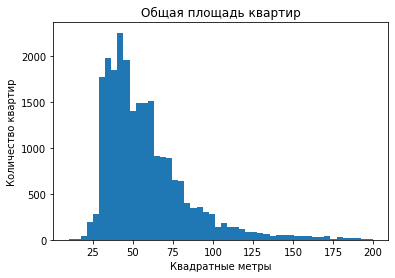

In [71]:
# общая площадь
plt.hist(data['total_area_m2'], bins=50, range=(10,200))
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

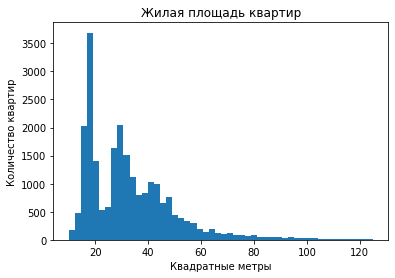

In [72]:
# жилая площадь
plt.hist(data['living_area_m2'], bins=50, range=(10,125))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

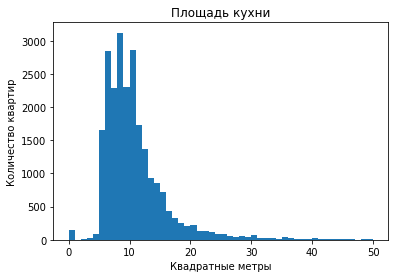

In [73]:
# площадь кухни
plt.hist(data['kitchen_area_m2'], bins=50, range=(0,50))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

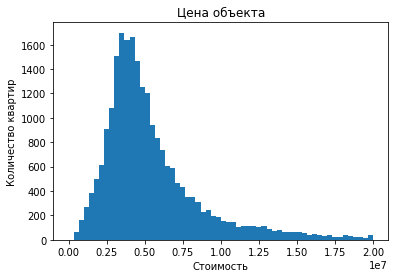

In [74]:
# цена объекта
plt.hist(data['last_price'], bins=60, range=(0,20000000))
plt.title('Цена объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

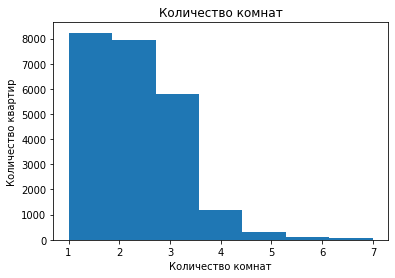

In [75]:
# количество комнат
plt.hist(data['number_of_rooms'], bins=7, range=(1,7))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

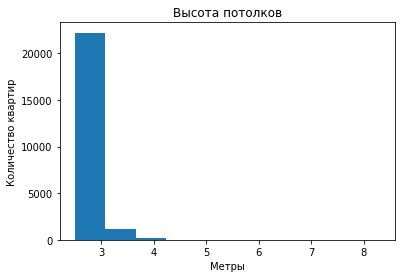

In [76]:
# высота потолков
plt.hist(data['ceiling_height_m'], bins=10)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

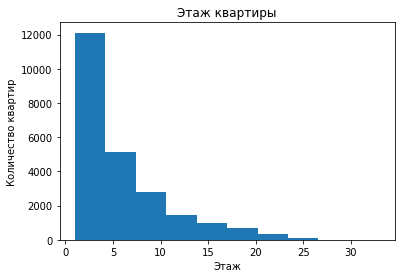

In [77]:
# этаж квартиры
plt.hist(data['floor'], bins=10)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

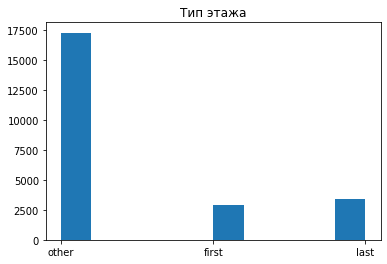

In [78]:
# тип этажа квартиры
plt.hist(data['floor_type'])
plt.title('Тип этажа')
plt.show()

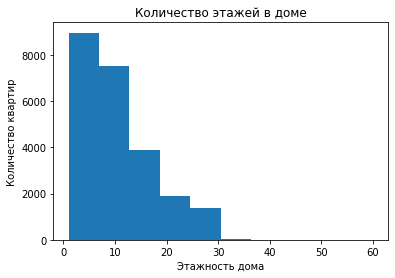

In [79]:
# общее количество этажей в доме
plt.hist(data['total_floors_in_house'], bins=10)
plt.title('Количество этажей в доме')
plt.xlabel('Этажность дома')
plt.ylabel('Количество квартир')
plt.show()

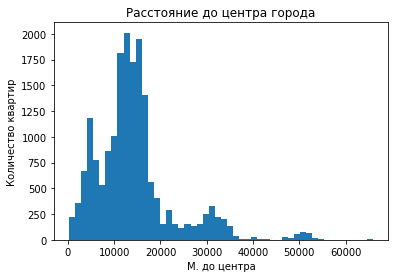

In [80]:
# расстояние до центра города в метрах
plt.hist(data['city_center_distance_m'], bins=50)
plt.title('Расстояние до центра города')
plt.xlabel('М. до центра')
plt.ylabel('Количество квартир')
plt.show()

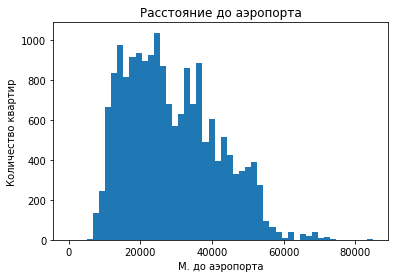

In [81]:
# расстояние до ближайшего аэропорта
plt.hist(data['nearest_airport_distance_m'], bins=50)
plt.title('Расстояние до аэропорта')
plt.xlabel('М. до аэропорта')
plt.ylabel('Количество квартир')
plt.show()

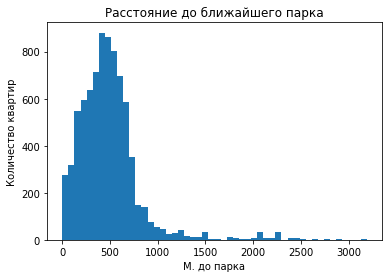

In [82]:
# расстояние до ближайшего парка
plt.hist(data['nearest_park_distance_m'], bins=50)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('М. до парка')
plt.ylabel('Количество квартир')
plt.show()

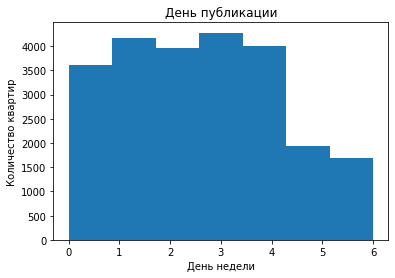

In [83]:
# день публикации объявления
plt.hist(data['weekday_exposition'], bins=7)
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

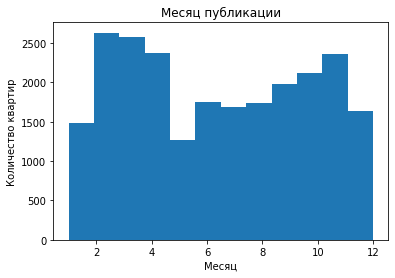

In [84]:
# месяц публикации объявления
plt.hist(data['month_exposition'], bins=12)
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

**Изучив наши параметры, видим, что:**

- **Площадь продаваемых квартир** преимущественно от 30 до 60 кв.м, пик около 40 кв.м.
- **Жилая площадь** имеет два пика - около 20 и 30 м
- **Площадь кухонь** в основном от 5 до 15м
- Преобладает **цена** в диапазоне от 2,5 до 7 млн, с пиком около 4 млн.
- В основном квартиры состоят из 1, 2 и 3 **комнат**. Есть также небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат больше похожи на выбросы.
- Большинство вариантов имеют **высоту потолков** от 2,5 до 3 метров.
- **Этаж квартиры.** Львиная доля продаваемых квартир находится в диапазоне от 1 до 5 этажа.
- **Тип этажа.** Квартир на первом и последнем этаже приблизительно одинаково, чуть более 2500. Но, всё же большая часть квартир находяися не на первом и последнем этажах.
- **Этажность домов** имеет обратно пропорциональную зависимость - чем высотнее здание, тем меньше квартир на продажу в них встречается. Преимущественно квартиры сосредоточены в пятиэтажных домах, также много домов с этажностью от 5 до 10.
- Основная масса квартир сосредочена в радиусе  4-20 км **от центра города**, присутствуют пиковые значения на 5 и около 15 км. от центра.
- Осносная масса продаваемых квартир находится от 10 до 40 км. **от аэропорта**, пик находится на около 20 км.
- **Парки** в основной массе находятся в пешей доступности до 1 км.
- **День недели.** Объявления в будние дни подаются почти в 2 раза чаще, чем в выходные.
- **Месяц.** Пик поданых объявлений приходится на февраль, март, апрель, ноябрь. В мае было подано объявлений в два раза меньше чем в пиковые месяца. Это говорит о том, что недвижимость выставляли на продажу преимущественно в конце зимы - начале весны, либо ближе к концу осени.

<a name="4.2."></a><b>4.2.</b>**Изучим, как быстро продавались квартиры.**
<br/> 
<font size="2">([к содержанию](#0.0))</font>

Посмотрим на гистограмму по всем значениям

<AxesSubplot:ylabel='Frequency'>

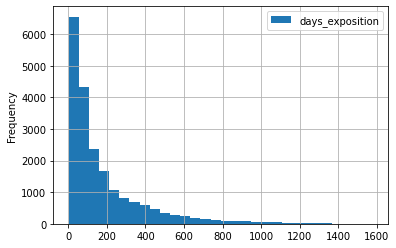

In [85]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True)

Поближе посмотрим на продажи до 250 дней:

<AxesSubplot:ylabel='Frequency'>

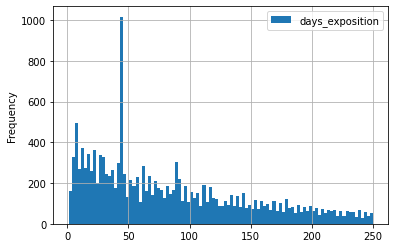

In [86]:
filtered = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90')
filtered.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,250))

Также взглянем на долгие продажи:

<AxesSubplot:ylabel='Frequency'>

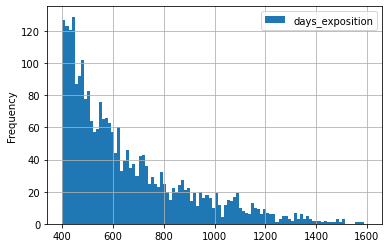

In [87]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (400,1600))

In [88]:
print('Время продажи (медиана):', round(data['days_exposition'].median()))
print('Время продажи (среднее):', round(data['days_exposition'].mean()))
data['days_exposition'].describe()

Время продажи (медиана): 95
Время продажи (среднее): 181


count    20446.000000
mean       180.516923
std        219.449110
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим большой размах по количеству дней, и большое стандартное отклонение

**Вывод:** 

Глядя на гистограмму видно, что в целом мы имеем распределение Пуассона. Медианное время продажи - 95 дней. Среднее время продажи - 181 день. Примерно более половины всех квартир продаются за срок в 100 дней. На гистограмме со значениями от 0 до 250 с кол-вом корзин 100, мы видим сразу 3 пиковых значения: около 45, 60 и 90 дней. Быстрой продажей можно назвать срок в 45 дней и меньше, долгой продажей - срок более года (от 400 дней) и дольше.

Проведя поиск в интернете и посмотрев условия размещения объявлений в сервисе Яндекс.Недвижимость(https://yandex.ru/support/realty/owner/home/add-ads-housing.html), стало понятно, что пиковые значения в 45, 60 и 90 дней образовались из-за того, что согласно условиям размещения объявления, именно после этих сроков объявление считается неактуальным и снимается автоматически. Поэтому, данные значения при анализе данных во внимание брать не стоит.

<a name="4.3."></a><b>4.3.</b>**Изучим факторы, наиболее влияющие на общую (полную) стоимость объекта.**
<br/> 
<font size="2">([к содержанию](#0.0))</font>

**Зависимость цены от общей площади**

Корреляция цены и общей площади: 0.6424333663023015


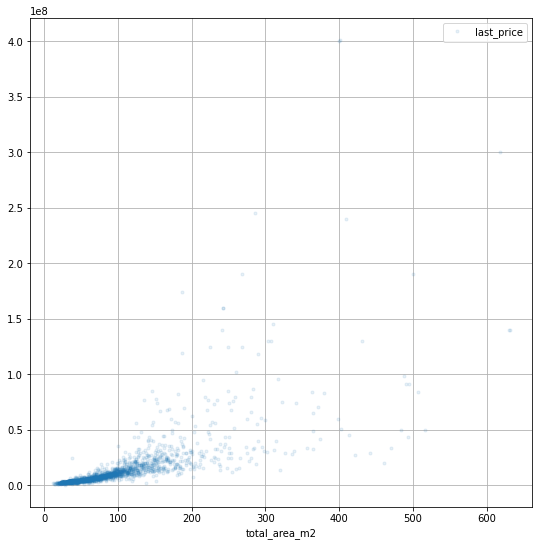

In [89]:
data.pivot_table(index='total_area_m2', values='last_price').plot(grid=True, style='o', figsize=(9, 9),alpha = 0.1,markersize=3)
print('Корреляция цены и общей площади:', data['total_area_m2'].corr(data['last_price']))

**Вывод:**

Зависимость цены от площади квартиры прослеживается по площади до 100 кв.м(там есть единичные выбросы). Как мы видим на графике, разброс цен начинается после площади 100 кв.м.

**Зависимость цены от жилой площади**

Корреляция цены и жилой площади: 0.5711563769027181


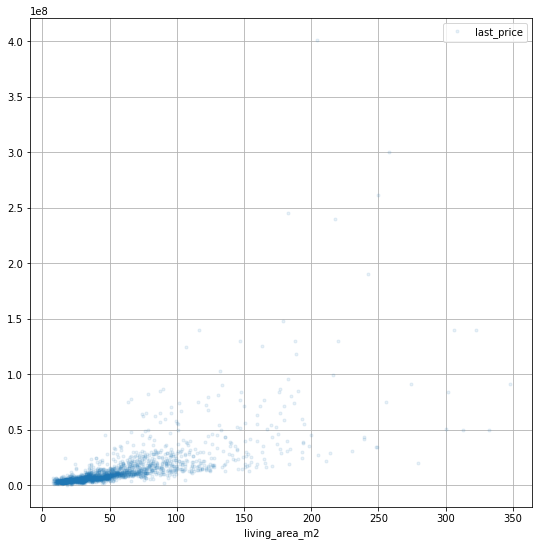

In [90]:
data.pivot_table(index='living_area_m2', values='last_price').plot(grid=True, style='o', figsize=(9, 9),alpha = 0.1, markersize=3)
print('Корреляция цены и жилой площади:', data['living_area_m2'].corr(data['last_price']))

**Вывод:**
Здесь зависимость цены от жилой площади меньше, чем в предыдущем наболюдении. Сильно ничего не поменялось.

**Зависимость цены от площади кухни**

Корреляция цены и площади кухни: 0.5041817865884121


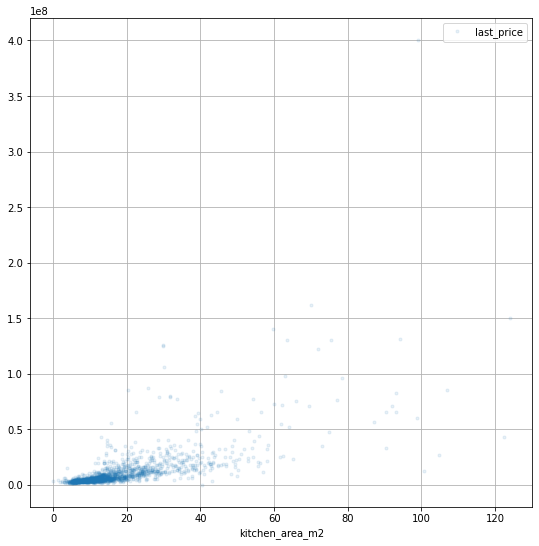

In [91]:
data.pivot_table(index='kitchen_area_m2', values='last_price').plot(grid=True, style='o', figsize=(9, 9),alpha = 0.1,markersize=3)
print('Корреляция цены и площади кухни:', data['kitchen_area_m2'].corr(data['last_price']))

**Вывод:**

Зависимость цены от площади кухни стала еще меньше - 0,5. Слабая корреляция. Врядли можно утверждать о том, что эти два параметра могут быть сильно взаимосвязаны.

**Зависимость цены от количества комнат**

Корреляция цены и количества комнат: 0.35315633586658013


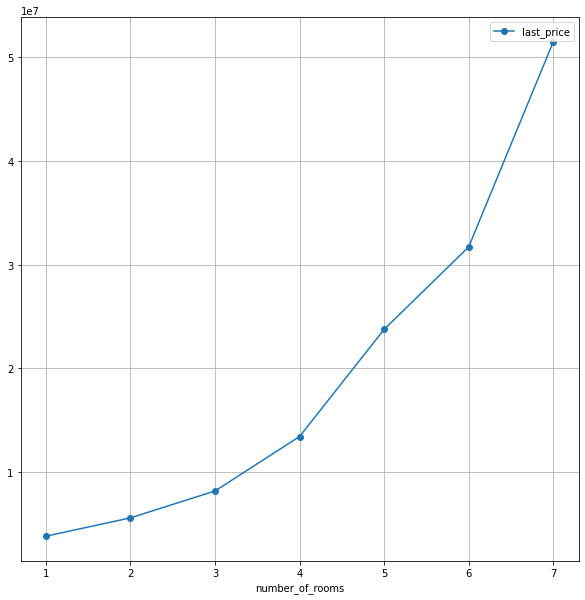

In [92]:
data.pivot_table(index='number_of_rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
print('Корреляция цены и количества комнат:', data['number_of_rooms'].corr(data['last_price']))

**Вывод:**

Корреляция между этими двумя величинами низкая, что очень странно. Ведь очевидно, что количество комнат напрямую влияет на цену. Если мы посмотрим на график, то можем заметить: цена у 1-,2- и 3-комнатных квартир, действительно не сильно отличается. А вот от 4-х комнат и далее график стремительно летит вверх, т.е. после 4 комнат зависимость прослеживается намного сильнее.

**Зависимость цены от этажа**

<AxesSubplot:xlabel='floor_type'>

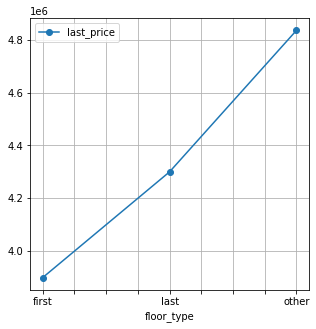

In [93]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

**Вывод:**

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м, и не на последнем этаже.

**Зависимость цены от дня недели, месяца и года размещения объявления**

<AxesSubplot:xlabel='year_exposition'>

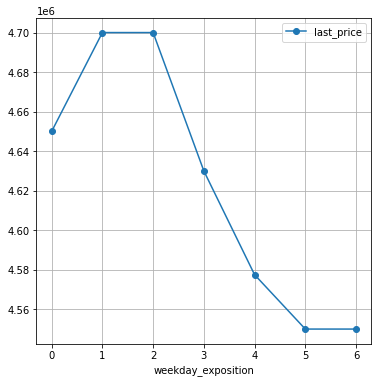

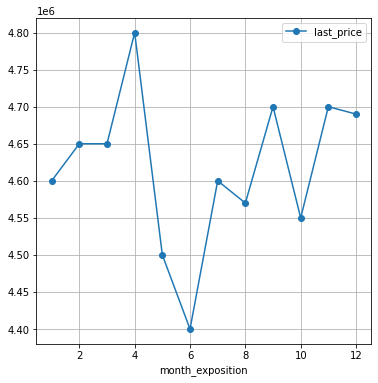

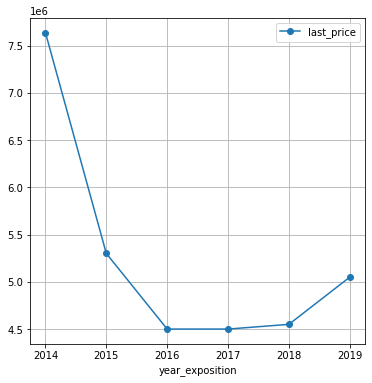

In [94]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(6, 6))
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(6, 6))
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(6, 6))

**Вывод:**
* Из графиков можно увидеть, что самые дорогие квартиры выствлялись на продажу во вторник и среду, с каждым следующим днём средняя цена квартиры снижалась. И, наконец, в воскресенье выставлялись самые дешевые квартиры.
* Если смотреть на цену квартиры по месяцу выставления на продажу, то мы увидим, что в апреле квартиры выставлялись дороже всего, а в июне наоборот- самые дешевые. Нечто похожее показала нам гистограмма по месяцу публикации, в конце пункта 4.1 нашего исследования. На рынке недвижимости, как и во многих других сферах, присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Скорее всего, это связано с отпусками.
* Цена квартир с 2014 по 2016 года сильно "провалилась" вниз, ввиду непростой экономической обстановки в те годы. с 2016 по 2018 год цена квартир была стабилизирована, а после 2018 медленно стала рости, в среднем на 500т.р.

<a name="4.4."></a><b>4.4.</b>**Средняя цена одного квадратного метра в топ-10 населённых пунктах.**
<br/> 
<font size="2">([к содержанию](#0.0))</font>

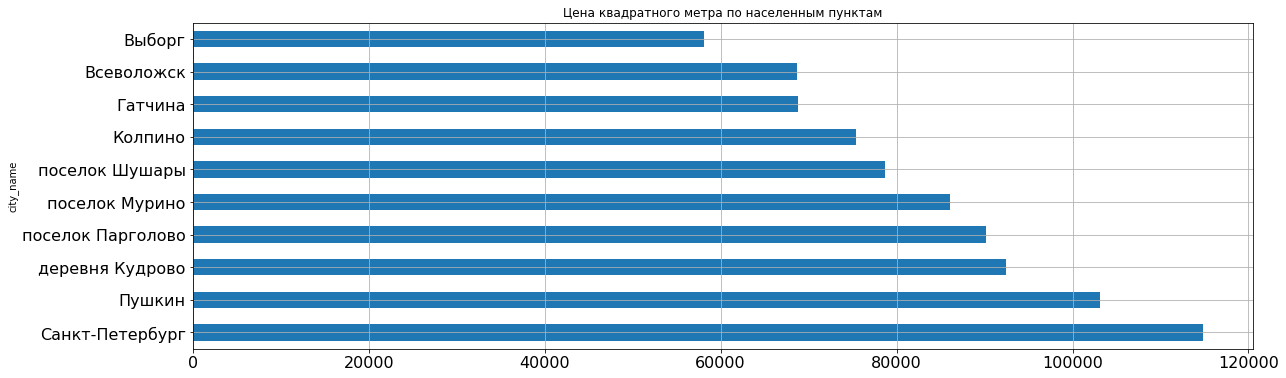

In [95]:
# создадим новую переменную с 10 городами по количеству объявлений
ten_city_top = data['city_name'].value_counts().head(10)

# создадим сводную таблицу со средним значением квадратного метра для каждого населенного пункта из топ-10
city_price_metr = data.query('city_name in (@ten_city_top.index)')\
.pivot_table(index='city_name', values='price_per_meter')

# переведём столбец в целочисленный тип и построим график
city_price_metr = city_price_metr.astype(int)
(
    city_price_metr.sort_values('price_per_meter', ascending=False)
    .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16, grid=True)
)
plt.title('Цена квадратного метра по населенным пунктам');

**Вывод:**

Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Из топ-10 наименьшая стоимость квадратного метра в Выборге.

<a name="4.5."></a><b>4.5.</b>**Средняя цена километра от центра.**
<br/> 
<font size="2">([к содержанию](#0.0))</font>

<AxesSubplot:xlabel='city_center_distance_km'>

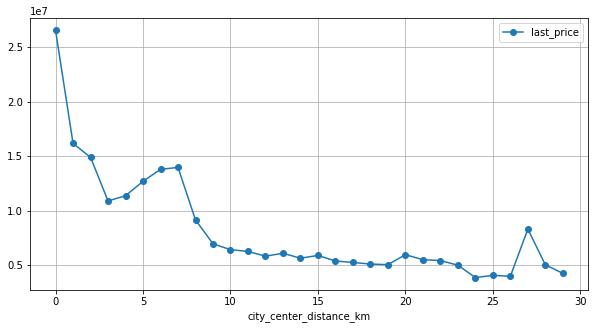

In [96]:
# Выбираем Санкт-Петербург, применим сводную таблицу и выведем график, где указана стоимость для каждого км
data.query('city_name == "Санкт-Петербург" and last_price < 100000000')\
.pivot_table(index='city_center_distance_km', values='last_price')\
.plot(grid=True, style='o-', figsize=(10, 5))

In [97]:
print('Корреляция цены и дистанции в км:', data['city_center_distance_km'].corr(data['last_price']))

Корреляция цены и дистанции в км: -0.21196111557598182


<AxesSubplot:xlabel='city_center_distance_km'>

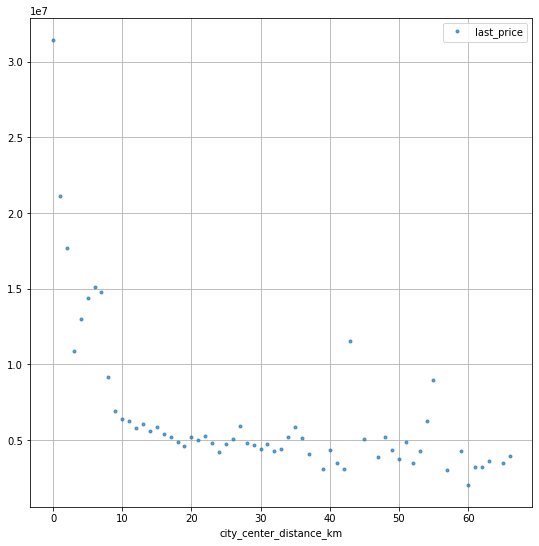

In [98]:
data.pivot_table(index='city_center_distance_km', values='last_price', aggfunc='mean').plot(grid=True, style='o', figsize=(9, 9),alpha = 0.7, markersize=3)

<AxesSubplot:xlabel='city_center_distance_km'>

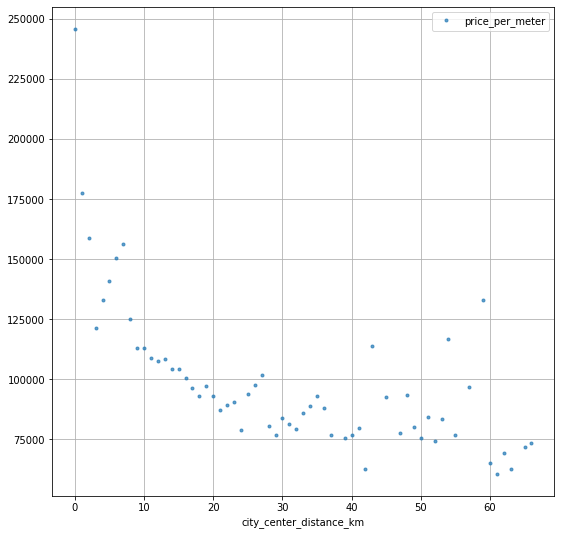

In [99]:
data.pivot_table(index='city_center_distance_km', values='price_per_meter', aggfunc='mean').plot(grid=True, style='o', figsize=(9, 9),alpha = 0.7, markersize=3)

**Вычислим среднюю цену каждого километра**

,price_per_meter
city_center_distance_km,
0,245833.530370
1,177362.980579
2,158581.337876
3,121179.151695
4,132829.545168
5,140923.606086
6,150290.154318
7,156176.879524
8,125097.739781


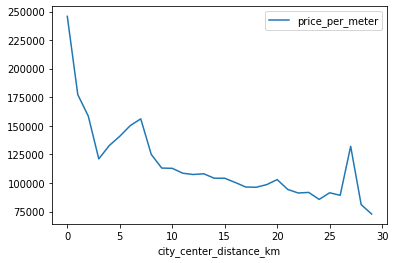

In [100]:
# вычислим среднюю цену каждого километра по цене за квадратный метр
data['city_center_distance_km'] = data['city_center_distance_km'].fillna(999999)
data['city_center_distance_km'] = data['city_center_distance_km'].astype('int')
pivot_centre_km = data.query('city_name == "Санкт-Петербург" and city_center_distance_km != 999999')\
.pivot_table(index = 'city_center_distance_km', values = 'price_per_meter', aggfunc = 'mean')
pivot_centre_km.plot()
pivot_centre_km

,last_price
city_center_distance_km,
0,31449.115852
1,21139.475784
2,17701.372810
3,10887.365951
4,13011.086593
5,14381.679140
6,15112.406758
7,14775.152586
8,9144.371961


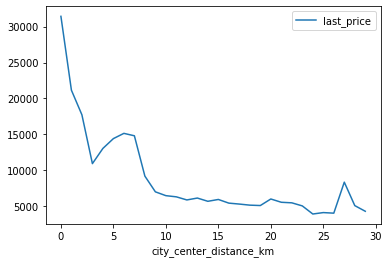

In [101]:
# вычислим среднюю цену каждого километра по цене на момент снятия с публикации
data['city_center_distance_km'] = data['city_center_distance_km'].fillna(999999)
data['city_center_distance_km'] = data['city_center_distance_km'].astype('int')
pivot_centre_km_2 = data.query('city_name == "Санкт-Петербург" and city_center_distance_km != 999999')\
.pivot_table(index = 'city_center_distance_km', values = 'last_price', aggfunc = 'mean')
pivot_centre_km_2['last_price'] /= 1000
pivot_centre_km_2.plot()
pivot_centre_km_2

**Вывод:**

Квартиры, которые находятся в центре (<1 км) резко отличаются в цене от тех, которые находятся на расстоянии всего 1 км от центра.
Цена квартир в 1-2 км от центра практически не отличается. Далее мы видим так же тенденцию к снижению стоимости по удаленности от центра. С 3 до 7 км от центра мы видим обратную зависимость - цена растет, но не значительными темпами. Начиная с 7 км от центра цена стремится вниз, в зависимости от удаленности. Непонятный пик приходится на 27 км: предположительно, выброс повлиял на этот пик. Но в целом наблюдается отрицательная корелляция - стоимость объектов снижается с увеличением расстояния от центра города. Это выглядит вполне реалистично, т.к. в любом городе, чем ближе к центру, тем дороже недвижимость.

<a name="5."></a><font size="5"><b>Шаг 5. Общий вывод</b></font><br/> 
<font size="2">([к содержанию](#0.0))</font>

Мы ознакомились с полученным архивом данных, затем обработали пропущенные значения там, где это было необходимо, заменили типы данных на необходимые для удобной работы. Мы старались максимально сохранить полученные данные, что бы в анализ вошло как можно больше достоверной информации. Ведь при исследовательском анализе данных и построении графиков мы всегда можем отбросить аномальные значения срезом данных. 

Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир, для дальнейшего анализа. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. 

Изучая время продажи квартир мы выявили, что большая часть квартир продается до 100 дней. но так же много встречается квартир, которые продаются до 400 дней, поэтому срок продажи квартиры до 400 дней можно считать нормальным. Также мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. 

Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, общая площадь. В меньшей степени на стоимость квадратного метра влияют жилая площадь и площадь кухни. 
Также, оказывают влияние день, месяц, год размещения: 
* Из графиков можно увидеть, что самые дорогие квартиры выствлялись на продажу во вторник и среду, с каждым следующим днём средняя цена квартиры снижалась. И, наконец, в воскресенье выставлялись самые дешевые квартиры.
* Если смотреть на цену квартиры по месяцу выставления на продажу, то мы увидим, что в апреле квартиры выставлялись дороже всего, а в июне наоборот- самые дешевые. Нечто похожее показала нам гистограмма по месяцу публикации, в конце пункта 4.1 нашего исследования. На рынке недвижимости, как и во многих других сферах, присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Скорее всего, это связано с отпусками.
* Цена квартир с 2014 по 2016 года сильно "провалилась" вниз, ввиду непростой экономической обстановки в те годы. с 2016 по 2018 год цена квартир была стабилизирована, а после 2018 медленно стала рости, в среднем на 500т.р.

Затем мы рассчитали среднюю цену одного квадратного метра в топ-10 населённых пунктах. Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Из топ-10 наименьшая стоимость квадратного метра в Выборге.

И, в конце концов, вычислили среднюю цену каждого километра от центра. Расчёты проводили как по цене за квадратный метр, так и по цене на момент снятия с публикации. Зависимость цены от расположения квартиры прослеживается, и это очевидно: во всех крупных городах квартиры, находящиеся ближе к центру стоят дороже. Эта зависимость прослеживается на расстоянии примерно до 12 и меньше км от центра, далее удаленность всё меньше и меньше сказывается на цене. Тем не менее, была отчётливо видна тенденция к снижению стоимости по удаленности от центра.

На этом всё, спасибо за внимание, надеемся, что наше исследование вам понравилось. И что оно поможет вам сделать правильные выводы, а также принять правильные решения.